In [2]:
from baseline.dataset import CustomDataLoader
import glob
from baseline.model import multihead_with_quant
from baseline.dataset import train_transform, val_transform
import random
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#utils
def get_image_dirs(image_root_dir):
    return glob.glob(image_root_dir + '/*.png')


In [4]:
model_weight_dir = '/opt/ml/runs/mseloss_clsupgrade_multihead_with_quant/best.pth'
model = multihead_with_quant(38, 6, 'cuda')
model = model.to('cuda')
state_dict = torch.load(model_weight_dir)
model.load_state_dict(state_dict)
model.eval()
print('loaded')

loaded


In [8]:
image_root_dir = '/opt/ml/data/white_images'
image_dirs = get_image_dirs(image_root_dir)
sampled_image_dirs = random.sample(image_dirs, 10)

category_names = [
    'Aerosol',
    'Alcohol',
    'Awl',
    'Axe',
    'Bat',
    'Battery',
    'Bullet',
    'Firecracker',
    'Gun',
    'GunParts',
    'Hammer',
    'HandCuffs',
    'HDD',
    'Knife',
    'Laptop',
    'Lighter',
    'Liquid',
    'Match',
    'MetalPipe',
    'NailClippers',
    'PortableGas',
    'Saw',
    'Scissors',
    'Screwdriver',
    'SmartPhone',
    'SolidFuel',
    'Spanner',
    'SSD',
    'SupplymentaryBattery',
    'TabletPC',
    'Thinner',
    'USB',
    'ZippoOil',
    'Plier',
    'Chisel',
    'Electronic cigarettes',
    'Electronic cigarettes(Liquid)',
    'Throwing Knife'
]


In [9]:
images, preds = [], []
for dir in sampled_image_dirs:
    image = cv2.imread(dir)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image = val_transform(image = image)['image'].unsqueeze(0).to('cuda')

    out, _ = model(image)
    pred = torch.argmax(out, dim = -1).cpu().detach()
    images.append(image)
    preds.append(pred)

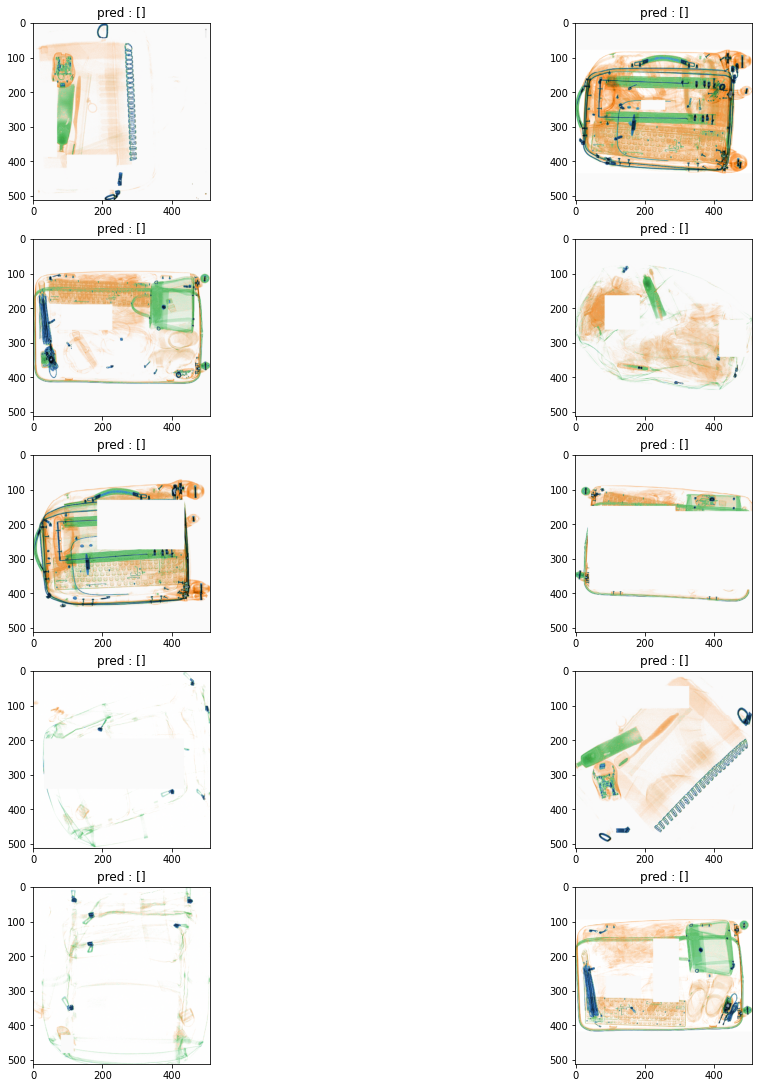

In [10]:
fig, axes = plt.subplots(
    nrows= 5, 
    ncols= 2, 
    figsize=(15, 15), 
    constrained_layout=True
)

mean, std = 0.5, 0.2
for ax, image, pred in zip(axes.ravel(), images, preds):
        # Original Image
        image = image.squeeze().cpu()
        image =  (image*std*255) + (mean*255)

        pred_idx = np.where(pred==1)[0]
        pred = [ category_names[cat_id] for cat_id in pred_idx]

        ax.imshow(image.permute(1,2,0).numpy().astype(int))
        ax.set_title(f"pred : {pred}")

